In [56]:
#upload data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('mlp_data.csv')
data.head()

,X1,X2,label
0,0.270675,0.495798,0
1,3.746660,5.468046,1
2,4.565179,6.400099,1
3,6.276924,2.184165,1
4,3.997295,8.819751,1


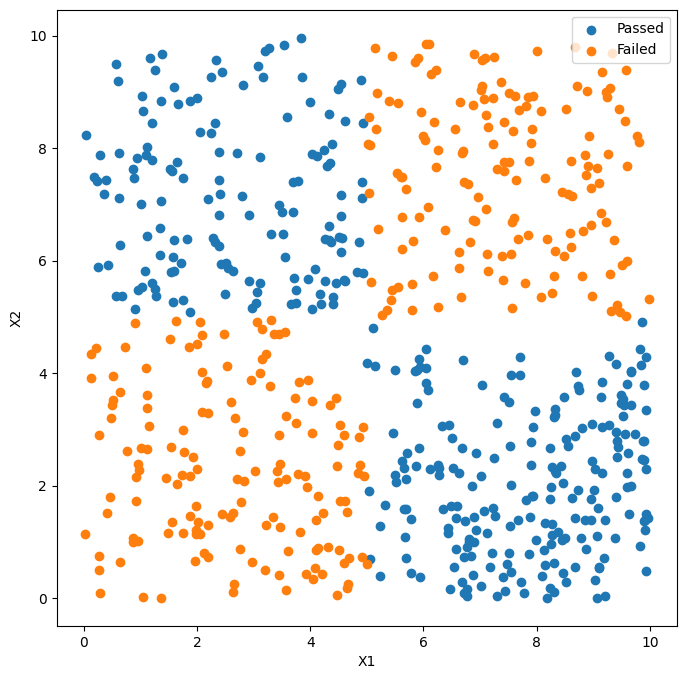

In [55]:
#Visualizing Data
%matplotlib inline
from matplotlib import pyplot as plt
x = data.drop('label', axis=1)
y = data['label']

fig0 = plt.figure(figsize=(8, 8))
passed = plt.scatter(x['X1'][y==1], x['X2'][y==1])
failed = plt.scatter(x['X1'][y==0], x['X2'][y==0])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()


In [60]:
#split data to test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(459, 2) (459,)
(197, 2) (197,)


In [61]:
#setup model
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(20, input_dim=2, activation='sigmoid'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mlp.compile(loss='binary_crossentropy', optimizer='adam')
mlp.fit(x_train, y_train, epochs=2000)


In [64]:
#find accurancy of test and train data
from sklearn.metrics import accuracy_score


y_pred_train_binary = np.round(mlp.predict(x_train)).astype(int)  # 将概率四舍五入为0或1
y_pred_test_binary = np.round(mlp.predict(x_test)).astype(int)    # 将概率四舍五入为0或1

# 计算准确率
y_accuracy_train = accuracy_score(y_train, y_pred_train_binary)
y_accuracy_test = accuracy_score(y_test, y_pred_test_binary)
print("Train Accuracy:", y_accuracy_train)
print("Test Accuracy:", y_accuracy_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Accuracy: 0.9782135076252724
Test Accuracy: 0.9746192893401016


In [66]:

y_train_pred_form = pd.Series(i[0] for i in y_pred_train_binary)
print(y_train_pred_form)


0      1
1      0
2      0
3      0
4      1
      ..
454    1
455    0
456    1
457    0
458    1
Length: 459, dtype: int64


In [70]:
#create new data
xx, yy = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
x_range = np.c_[xx.ravel(), yy.ravel()]

y_range_predict = (mlp.predict(x_range) > 0.5).astype(int).flatten()

print(type(y_range_predict))
print(y_range_predict.shape)  # 查看形状

y_range_predict_form = pd.Series(y_range_predict)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
<class 'numpy.ndarray'>
(10000,)


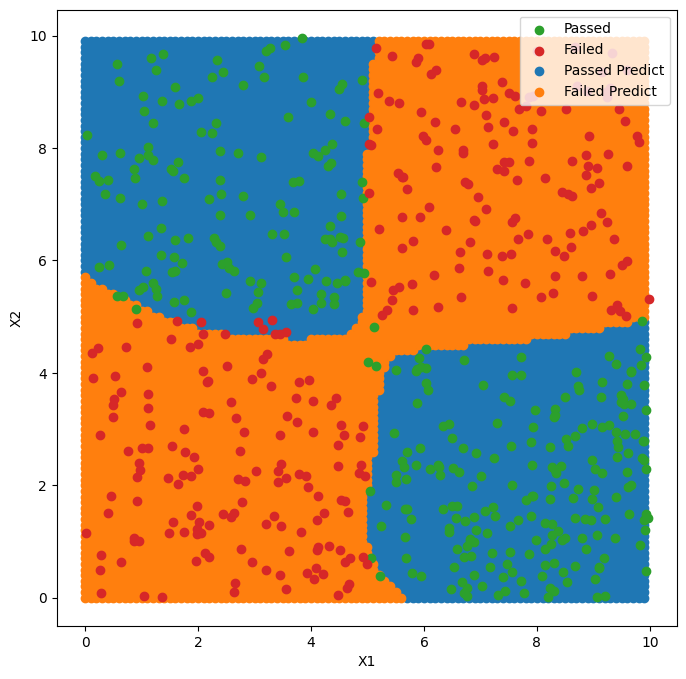

In [71]:
#可视化整个图
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8, 8))
passed_predict = plt.scatter(x_range[:, 0][y_range_predict_form==1], x_range[:, 1][y_range_predict_form==1])
failed_predict = plt.scatter(x_range[:, 0][y_range_predict_form==0], x_range[:, 1][y_range_predict_form==0])
passed = plt.scatter(x['X1'][y==1], x['X2'][y==1])
failed = plt.scatter(x['X1'][y==0], x['X2'][y==0])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((passed, failed, passed_predict, failed_predict), ('Passed', 'Failed', 'Passed Predict', 'Failed Predict'))
plt.show()